In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
import seaborn as sns
import math
# Ignore sklearn warning for now
import warnings
warnings.filterwarnings('ignore') 
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
import os
os.getcwd()

'D:\\research\\coding\\medicine\\gods21\\experiments\\phenotype_viz'

In [9]:
norm_data=pd.read_csv('../../data/phenotype_viz/norm_data_Andrews_shuffled.csv', index_col=0)
norm_data

,sex,age,age cat,BMI,BMI cat,ACTH,Cortisol,Cholesterol,LDL,HDL,...,T4,TSH,AST,ALT,Gamma_GT,ALP,Bilirubin,Albumin,Leptin,Adiponectin
0,0.0,0.484848,1,0.429907,Overweight,0.101611,0.094162,0.347319,0.443889,0.201521,...,0.386364,0.337805,0.254545,0.128205,0.100000,0.083591,0.247863,0.020319,0.375892,0.356959
1,1.0,0.212121,1,0.457944,Overweight,0.086121,0.254237,0.355892,0.453704,0.223379,...,0.265152,0.407317,0.241769,0.188034,0.150000,0.239293,0.179487,0.027609,0.375892,0.356959
2,0.0,0.454545,1,0.264798,Normal Weight,0.083024,0.374765,0.301558,0.324074,0.287430,...,0.181818,0.324390,0.181818,0.119658,0.091667,0.167183,0.162393,0.020319,0.375892,0.356959
3,0.0,0.151515,0,0.255452,Normal Weight,0.226766,0.170621,0.000000,0.512795,0.000000,...,0.242424,0.348780,0.272727,0.213675,0.075000,0.272446,0.094017,0.007741,0.001529,0.356959
4,0.0,0.575758,1,0.168224,Normal Weight,0.326518,0.423729,0.760384,0.953704,0.247398,...,0.250000,0.637805,0.090909,0.042735,0.025000,0.080495,0.119658,0.017900,0.375892,0.356959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.0,0.818182,2,0.205607,Normal Weight,0.181537,0.227872,0.335668,0.512795,0.216333,...,0.068182,0.195122,0.309091,0.059829,0.091667,0.239293,0.495726,0.023222,0.000000,0.586926
77,1.0,0.484848,1,0.697819,Obese,0.184015,0.235405,0.355892,0.324074,0.303443,...,0.409091,0.106098,0.181818,0.162393,0.075000,0.179567,0.247863,0.010643,0.375892,0.356959
78,0.0,0.636364,1,0.557632,Overweight,0.394672,0.397363,0.681901,1.000000,0.079263,...,0.166667,0.202439,0.127273,0.111111,0.150000,0.148607,0.102564,0.013062,0.375892,0.356959
79,0.0,0.000000,0,0.003115,Underweight,0.311648,0.140490,0.307716,0.512795,0.105044,...,0.113636,0.281707,0.272727,0.085470,0.066667,0.755418,0.196581,0.027818,0.375892,0.356959


In [16]:
# norm_data_shuffled = norm_data.sample(frac=1).reset_index(drop=True)
# norm_data_shuffled.to_csv('norm_data_Andrews_shuffled.csv')

In [10]:
norm_data['BMI cat'].replace(['Underweight','Normal Weight', 'Overweight', 'Obese'],[0,0,1,1],inplace=True)

In [11]:
norm_data

,sex,age,age cat,BMI,BMI cat,ACTH,Cortisol,Cholesterol,LDL,HDL,...,T4,TSH,AST,ALT,Gamma_GT,ALP,Bilirubin,Albumin,Leptin,Adiponectin
0,0.0,0.484848,1,0.429907,1,0.101611,0.094162,0.347319,0.443889,0.201521,...,0.386364,0.337805,0.254545,0.128205,0.100000,0.083591,0.247863,0.020319,0.375892,0.356959
1,1.0,0.212121,1,0.457944,1,0.086121,0.254237,0.355892,0.453704,0.223379,...,0.265152,0.407317,0.241769,0.188034,0.150000,0.239293,0.179487,0.027609,0.375892,0.356959
2,0.0,0.454545,1,0.264798,0,0.083024,0.374765,0.301558,0.324074,0.287430,...,0.181818,0.324390,0.181818,0.119658,0.091667,0.167183,0.162393,0.020319,0.375892,0.356959
3,0.0,0.151515,0,0.255452,0,0.226766,0.170621,0.000000,0.512795,0.000000,...,0.242424,0.348780,0.272727,0.213675,0.075000,0.272446,0.094017,0.007741,0.001529,0.356959
4,0.0,0.575758,1,0.168224,0,0.326518,0.423729,0.760384,0.953704,0.247398,...,0.250000,0.637805,0.090909,0.042735,0.025000,0.080495,0.119658,0.017900,0.375892,0.356959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.0,0.818182,2,0.205607,0,0.181537,0.227872,0.335668,0.512795,0.216333,...,0.068182,0.195122,0.309091,0.059829,0.091667,0.239293,0.495726,0.023222,0.000000,0.586926
77,1.0,0.484848,1,0.697819,1,0.184015,0.235405,0.355892,0.324074,0.303443,...,0.409091,0.106098,0.181818,0.162393,0.075000,0.179567,0.247863,0.010643,0.375892,0.356959
78,0.0,0.636364,1,0.557632,1,0.394672,0.397363,0.681901,1.000000,0.079263,...,0.166667,0.202439,0.127273,0.111111,0.150000,0.148607,0.102564,0.013062,0.375892,0.356959
79,0.0,0.000000,0,0.003115,0,0.311648,0.140490,0.307716,0.512795,0.105044,...,0.113636,0.281707,0.272727,0.085470,0.066667,0.755418,0.196581,0.027818,0.375892,0.356959


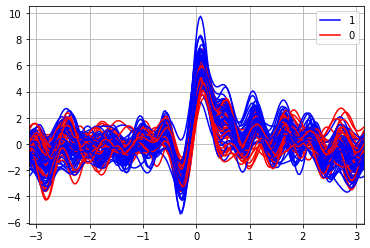

In [12]:
pd.plotting.andrews_curves(norm_data, 'BMI cat', color = ['b','r'])
plt.savefig('Andrews_binary.png',dpi = 400, bbox_inches='tight')

In [55]:
rho = data_scaled.corrwith(data_scaled['BMI cat']).sort_values()[::-1][1:]
rho

BMI                 0.733148
Insulin             0.384333
Leptin              0.348167
age                 0.305288
Gamma_GT            0.295794
age cat             0.283489
ALT                 0.242789
HbA1c               0.226459
Cholesterol         0.154699
LDL                 0.109729
AST                 0.072143
Glucose             0.039604
Bilirubin           0.033021
T3                  0.013794
TSH                -0.008560
ALP                -0.064260
Free fatty acids   -0.066765
sex                -0.068654
HDL                -0.074240
T4                 -0.083757
ACTH               -0.089661
Cortisol           -0.116745
Albumin            -0.153107
Adiponectin        -0.230327
dtype: float64

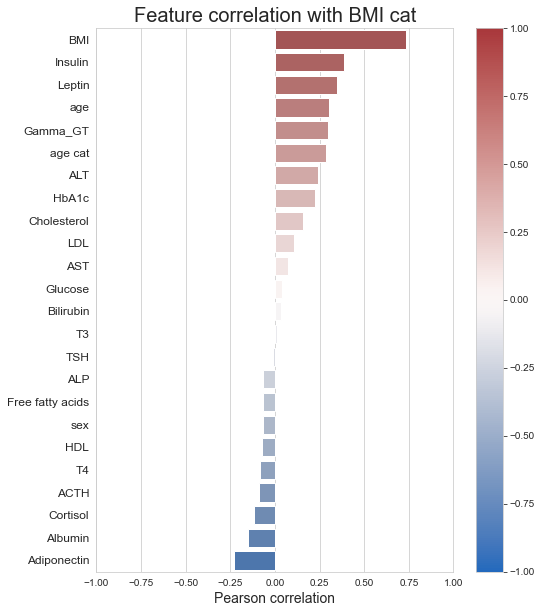

In [118]:
norm = plt.Normalize(-1,1)
sm = plt.cm.ScalarMappable(cmap="vlag", norm=norm)
sm.set_array([])
plt.figure(figsize=[8, 10])
plt.title("Feature correlation with BMI cat", fontsize=20)
sns.barplot(x=rho.values.squeeze(), y=rho.index, palette="vlag_r", orient="h")
plt.yticks(fontsize=12)
plt.xlabel("Pearson correlation", fontsize=14)
plt.colorbar(sm)
plt.xlim([-1, 1])
plt.savefig('correlation.png',dpi = 400, bbox_inches='tight')

In [123]:
['BMI cat'] + list(rho.index)

['BMI cat',
 'BMI',
 'Insulin',
 'Leptin',
 'age',
 'Gamma_GT',
 'age cat',
 'ALT',
 'HbA1c',
 'Cholesterol',
 'LDL',
 'AST',
 'Glucose',
 'Bilirubin',
 'T3',
 'TSH',
 'ALP',
 'Free fatty acids',
 'sex',
 'HDL',
 'T4',
 'ACTH',
 'Cortisol',
 'Albumin',
 'Adiponectin']

In [124]:
noise = 0.2*np.random.randn(norm_data.shape[0],norm_data.shape[1])
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(norm_data), columns=norm_data.columns)
data_noise = data_scaled + noise
data_noise['BMI cat'] = norm_data['BMI cat']
data_noise = data_noise[['BMI cat'] + list(rho.index)]

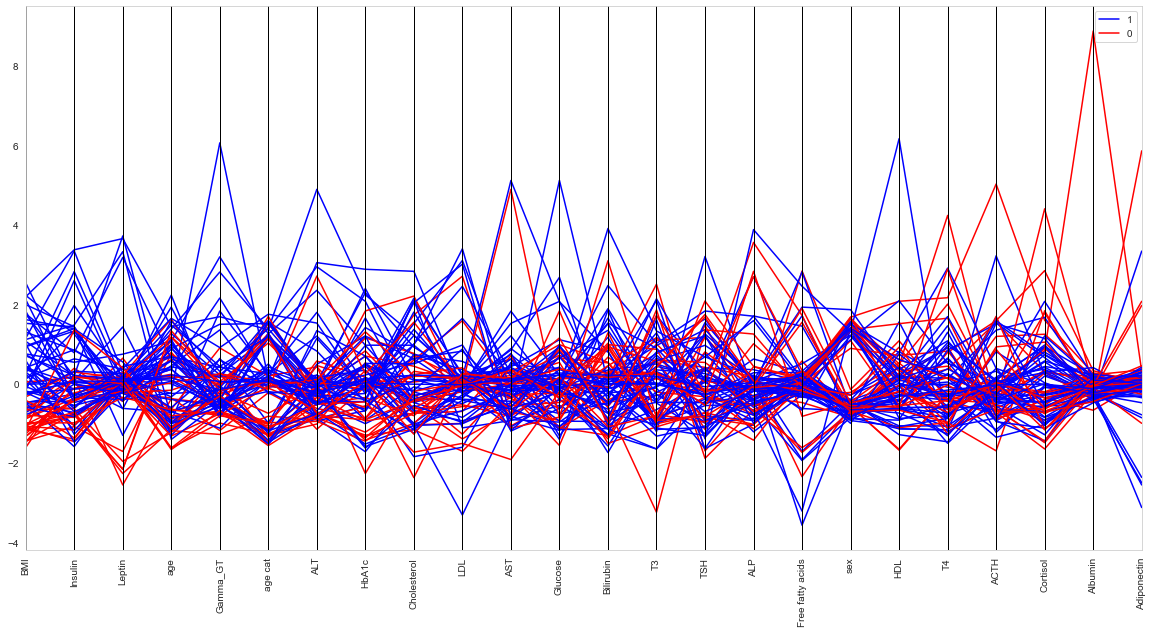

In [125]:
plt.figure(figsize=[20,10])
pd.plotting.parallel_coordinates(data_noise, 'BMI cat', color = ['b','r'])
plt.xticks(rotation = 90)
plt.savefig('Andrews_binary.png',dpi = 400, bbox_inches='tight')

In [101]:
rho2 = data_scaled.corr()
mask = np.triu(rho2)
np.fill_diagonal(mask, False)

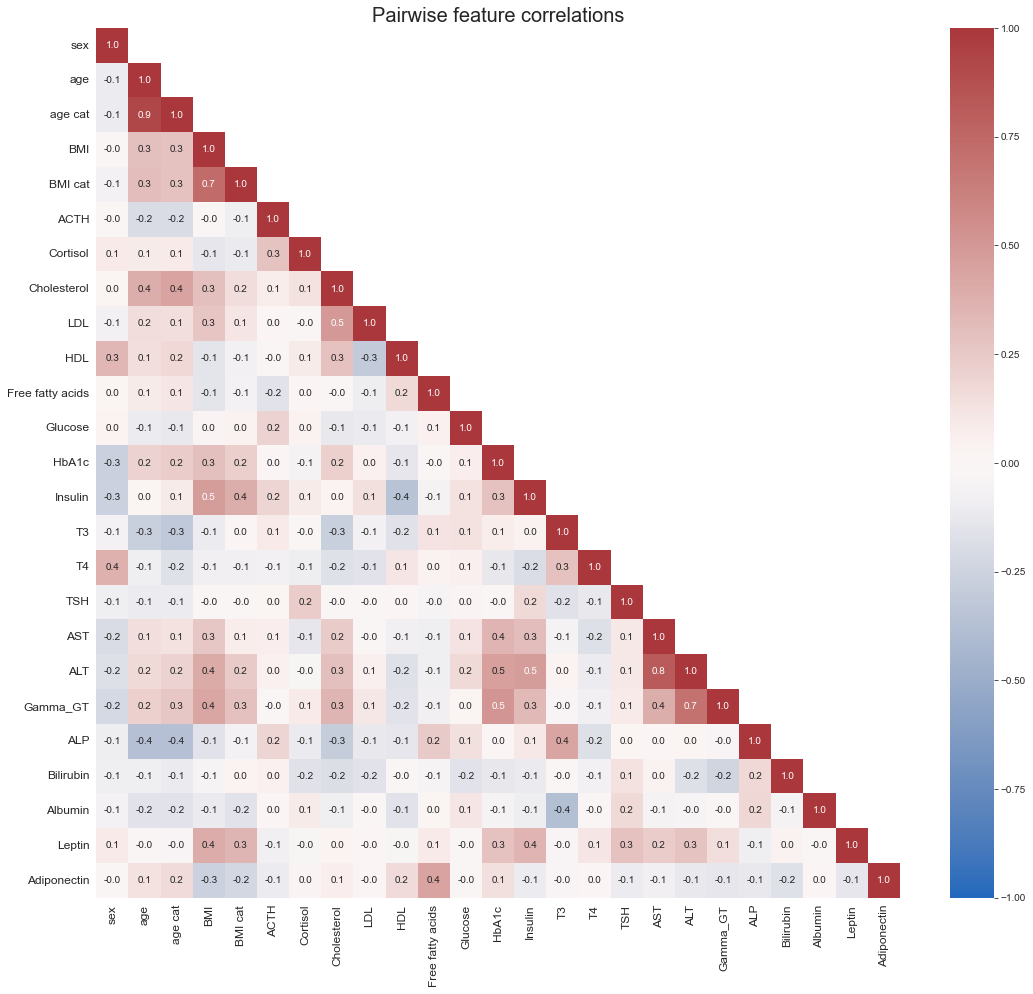

In [119]:
plt.figure(figsize=[18, 16])
plt.title("Pairwise feature correlations", fontsize=20)
sns.heatmap(rho2, mask=mask, annot=True, fmt=".1f", vmin=-1, vmax=1, cmap='vlag')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig('correlation_matrix.png', dpi = 400, bbox_inches='tight')